In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions as pf

# Introduction
### The purpose of this exploratory data analysis is to investigate how much of an impact the COVID19 outbreak has had on the airline industry. 
+ For the first part of this analysis we will look at the changes in passenger and cargo daily flight volumes. 
+ For the passenger airlines we will look at the following companies: United Airlines, Lufthansa, KLM Royal Ditch Airlines, China South Airline and All Nippon Airways.
+ The prediction is that when the COVID19 lockdowns began in March 2020 the passenger flight volumes began to drop rapidly. It is expected that the number of flights continued to stay low and have not returned to near normal levels since. 
+ Meanwhile during this same timeline I anticipate that cargo flight volumes will have increased, as this demand will have only increased and airlines will shift their services to this sector to minimize losses
  <br> 
+ For the second analysis we will examine how airline service shifted to mitigate losses, by examining passengers to  cargo flight volume ratios, both domestically and internationally. 
+ Qatar airline will be used since it provides both of these services. 

#### *Before beginning the analysis, we will explain what each of the parameters is:*


## EDA 1

#### *First we will load and process both of the datasets and ensure that they opened properly by printing df.head(). For this part only rows containing a NaN value under 'date' need to be dropped.*
1. **  **

In [3]:
#Call data processing function for the passenger airlines
df_passenger = pf.load_and_process_path('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartI_Passenger.csv')

#Call data processing function for the cargo airlines
df_cargo = pf.load_and_process_path('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartII_Cargo.csv')

df_passenger['type'] = 'passenger'
df_cargo['type'] = 'cargo'

#Combine passenger and cargo data frames(done this way to prevent excessively large file sizes)
df = pd.concat([df_passenger, df_cargo])

#print(len(df_passenger.index))
#print(len(df_cargo.index))





#### *Now we will check that the data loaded and filtered properly.*

In [4]:
df['date'].isnull().values.any()

False

In [5]:
df_passenger.head()

,Unnamed: 0,callsign,typecode,origin,destination,date,type
0,1,CSN311,B789,NaN,CYYZ,2020-07-31,passenger
1,19,UAL2832,B772,KSFO,RKSI,2020-07-31,passenger
2,22,KLM876,B77W,RPLL,EHAM,2020-07-31,passenger
3,24,KLM888,B789,VHHH,EHAM,2020-07-31,passenger
4,32,KLM702,B789,SAEZ,EHAM,2020-07-31,passenger


In [6]:
df_cargo.head()

,Unnamed: 0,callsign,typecode,origin,destination,date,type
0,8,FDX77,B77L,KOAK,YSSY,2020-07-31,cargo
1,17,CLX7309,B744,VHHH,ELLX,2020-07-31,cargo
2,23,FDX15,B77L,NaN,NaN,2020-07-31,cargo
3,28,GEC8400,B77L,EDDF,RKSI,2020-07-31,cargo
4,54,FDX5926,B77L,RKSI,RKSI,2020-07-31,cargo


0         passenger
1         passenger
2         passenger
3         passenger
4         passenger
            ...    
736273        cargo
736274        cargo
736275        cargo
736276        cargo
736277        cargo
Name: type, Length: 2549924, dtype: object

#### *Finally this data will be written to a new csv file.*

In [ ]:
df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_combined.csv')
df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_passenger.csv')
df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_cargo.csv')


In [ ]:
#Explore the data!
df.describe().T


In [ ]:
df.typecode.nunique()

In [ ]:
df.describe(exclude=[np.number])


In [14]:
#This function removes overly large count values
def remove_outliers(df):
    
    #Remove outliers
    df1 = df[df['Count'] < 1625]
    df1 = df1.iloc[3:]

    return df1

In [15]:
def sort_by_counts(df):
    df1 = df.groupby('date').count().reset_index()
    #df1 = df1.dropna(axis=0)
    df1.rename(columns = {'Unnamed: 0' : 'Count'}, inplace = True)
    
    #Remove other columns for this analysis
    #df1 = df1[['Count', 'date']]
    
    return df1

In [16]:
#This function returns the 7 day moving average of the counts of the passed in dataframe 
def moving_average(df):
    df['7 Day Avg'] = df['Count'].rolling(7).mean().shift(-3)
    
    df = df.dropna(axis = 0)
    
    return df

#### *Now we are ready to start exploring how daily flight volumes have changed since early 2019. The data will be prepared by using the Pandas .count() function to count the number of flights each day and append this to a new column titled 'Count.' Any rows with data dated prior to 2019 will be dropped.*

In [102]:
#Total flights sorted by daily volumes

dfma_total = df.groupby(['date', 'type']).count().reset_index()
dfma_total.rename(columns = {'Unnamed: 0' : 'Count'}, inplace = True)
#dfma_total['7 Day Avg'] = dfma_total['Count'].rolling(7).mean().shift(-3)
dfma_total = dfma_total.loc[2:]



#7 Day moving average of passenger flight volumes
dfma_passenger = moving_average(sort_by_counts(df_passenger))[1:]

#7 Day moving average of cargo daily flight volumes
dfma_cargo = moving_average(sort_by_counts(df_cargo))[1:]

dfma_total.head(500)

,date,type,Count,callsign,typecode,origin,destination
2,2019-01-01,cargo,464,464,441,322,260
3,2019-01-01,passenger,2757,2757,2570,1966,2053
4,2019-01-02,cargo,1016,1016,948,627,772
5,2019-01-02,passenger,3036,3036,2853,2221,2293
6,2019-01-03,cargo,1714,1714,1617,1196,1274
...,...,...,...,...,...,...,...
497,2019-09-05,passenger,3782,3782,3466,2618,2838
498,2019-09-06,cargo,1415,1415,1283,977,1025
499,2019-09-06,passenger,3706,3706,3390,2633,2805
500,2019-09-07,cargo,783,783,703,499,521


In [41]:
#Test
df1 = 
#df1 = df1.dropna(axis=0)


df1

,date,type,Count,callsign,typecode,origin,destination
2,2019-01-01,cargo,464,464,441,322,260
3,2019-01-01,passenger,2757,2757,2570,1966,2053
4,2019-01-02,cargo,1016,1016,948,627,772
5,2019-01-02,passenger,3036,3036,2853,2221,2293
6,2019-01-03,cargo,1714,1714,1617,1196,1274
...,...,...,...,...,...,...,...
1273,2020-09-28,passenger,1976,1976,1899,1277,1373
1274,2020-09-29,cargo,1853,1853,1684,1409,1462
1275,2020-09-29,passenger,1929,1929,1857,1248,1276
1276,2020-09-30,cargo,1706,1706,1546,1273,1316


In [21]:
#Resample by each month 
sns.set(rc={'figure.figsize':(20, 11)})
df_bymonth = dfma_total[['Count', 'date']].resample('M', on = 'date').Count.sum().reset_index(name = 'Count')

df_bymonth.head()




,date,Count
0,2019-01-31,108959
1,2019-02-28,112111
2,2019-03-31,129048
3,2019-04-30,133268
4,2019-05-31,137922


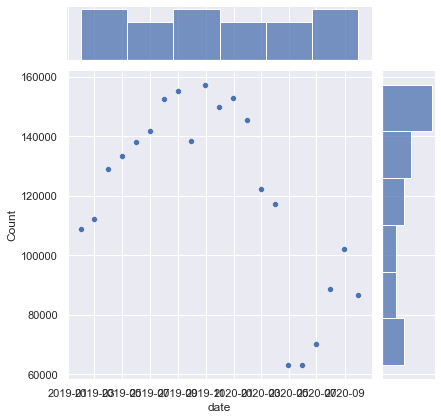

In [22]:
#Examine the monthly flight volumes 
sns.set(rc={'figure.figsize':(16, 8)})
ax = sns.jointplot(data = df_bymonth, x = "date", y = "Count")

#### *Explain what we are doing here*

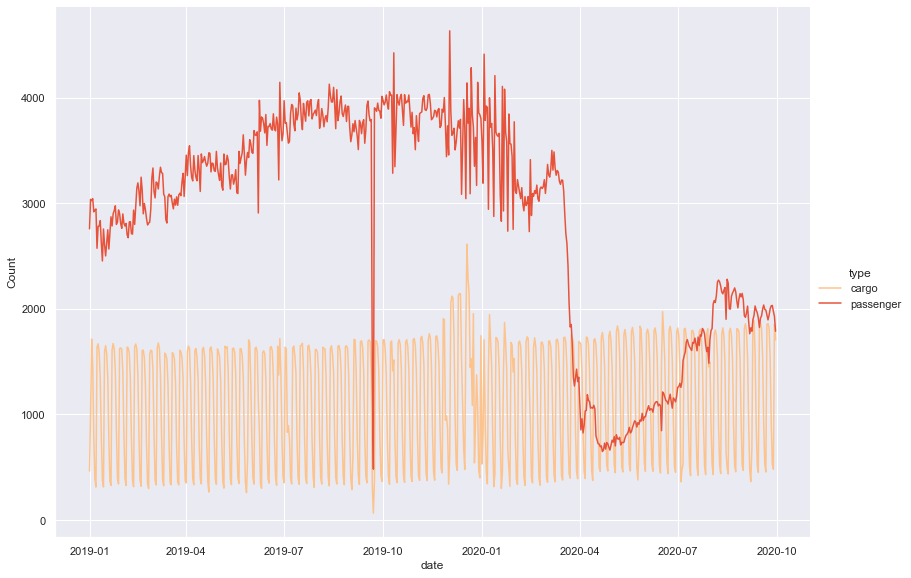

In [103]:

sns.set_style("darkgrid")
sns.set
ax = sns.relplot(data=dfma_total, x="date", y="Count", hue="type", kind="line", height=8, aspect=11.7/8.26, palette = "OrRd")




#### *We will identify and remove the outlier points occuring in the above figure just before 2019-10 and replot*

In [115]:
#Highlight out of range row
dfx = dfma_total.set_index(['date'])
print(dfx.loc['2019-09-19':'2020-10-25'].to_string())


#print(df.loc[dfma_total['date'] == "2019-09-22"])

                 type  Count  callsign  typecode  origin  destination
date                                                                 
2019-09-19      cargo   1687      1687      1522    1229         1271
2019-09-19  passenger   3779      3779      3434    2697         2923
2019-09-20      cargo   1398      1398      1273     972         1045
2019-09-20  passenger   3791      3791      3471    2709         2987
2019-09-21      cargo    322       322       296     210          182
2019-09-21  passenger   1391      1391      1272     794          911
2019-09-22      cargo     66        66        58      10           64
2019-09-22  passenger    483       483       453     148          433
2019-09-23      cargo    373       373       341     282          310
2019-09-23  passenger   3902      3902      3576    2807         3053
2019-09-24      cargo   1698      1698      1548    1229         1288
2019-09-24  passenger   3891      3891      3538    2752         2991
2019-09-25      carg

In [150]:


dfma_totalf = dfma_total[(dfma_total['date'] <= '2019-09-20') | (dfma_total['date'] >= '2019-09-23')]
dfma_totalf.head()

,date,type,Count,callsign,typecode,origin,destination
2,2019-01-01,cargo,464,464,441,322,260
3,2019-01-01,passenger,2757,2757,2570,1966,2053
4,2019-01-02,cargo,1016,1016,948,627,772
5,2019-01-02,passenger,3036,3036,2853,2221,2293
6,2019-01-03,cargo,1714,1714,1617,1196,1274


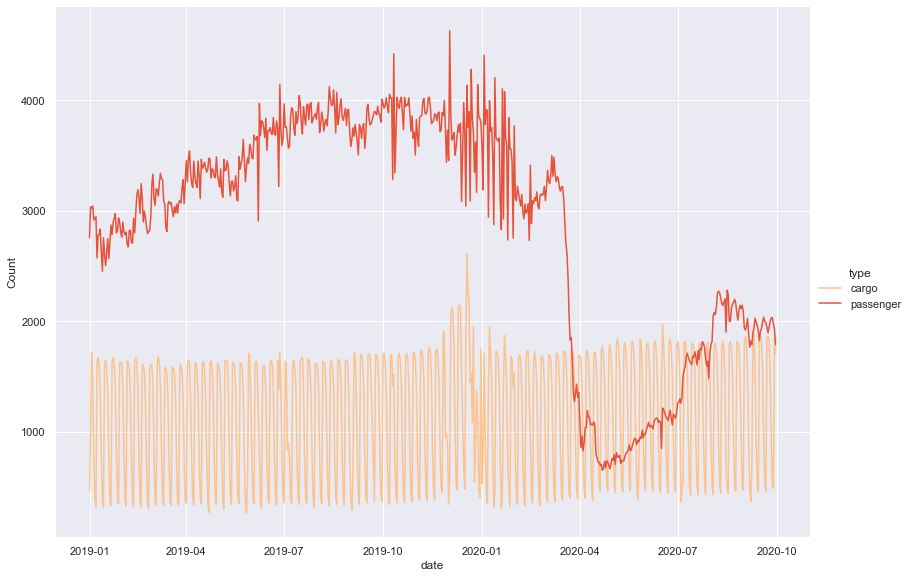

In [151]:

sns.set_style("darkgrid")
sns.set
ax = sns.relplot(data=dfma_totalf, x="date", y="Count", hue="type", kind="line", height=8, aspect=11.7/8.26, palette = "OrRd")




#### *Analysis*

*Find erratic data between 2019-11 and 2020-01*

*Let's now breakdown the data and do an overlay plot to compare the flights now to that of one year ago*

<AxesSubplot:xlabel='date'>

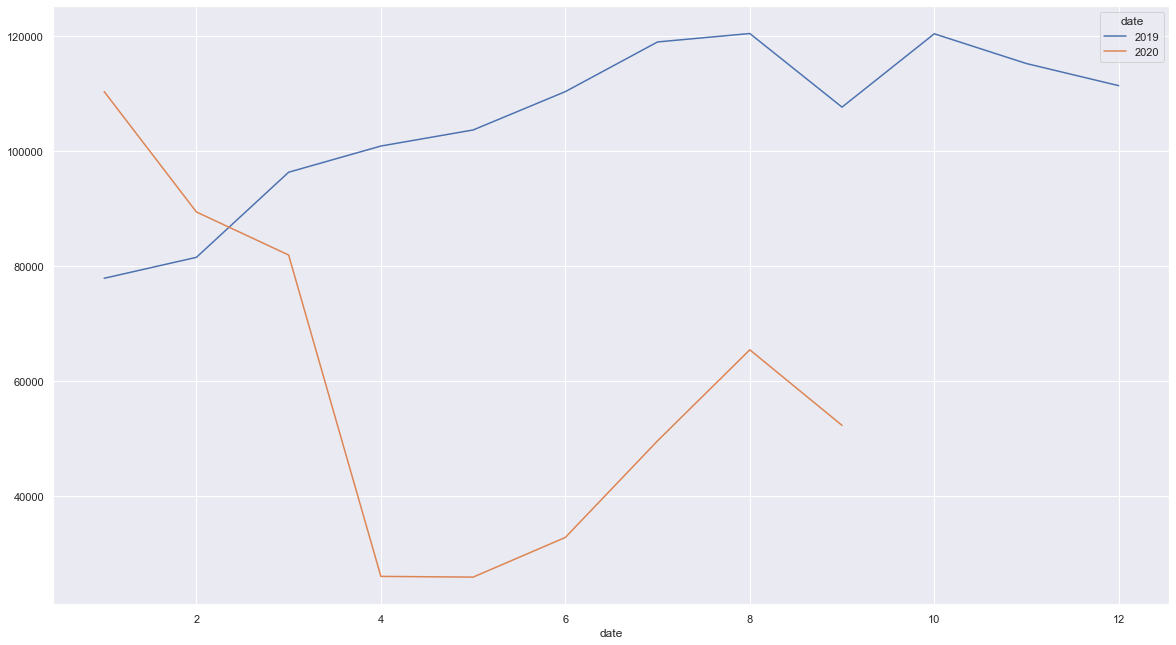

In [155]:
#Period 1: 2019-01-03 to 2019-09-30
#Period 2: 2020-01-01 to 2020-09-30
#Label axis

pv = pd.pivot_table(dfma_passenger, index = dfma_passenger.date.dt.month, columns = dfma_passenger.date.dt.year, values = 'Count', aggfunc = 'sum')
pv.plot()


## EDA 2

*Get the next set of data*

In [ ]:
dft = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/rawdata3.csv')





*Import csv and convert to dictionary. Use to change iata airport codes to countries*

In [ ]:
df_airports = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/external_sources/airport-codes.csv')
df_airports = df_airports[['ident', 'iso_country']]

dft = dft.dropna()
dft.head()


In [ ]:
iata_to_country = df_airports.set_index('ident').T.to_dict('list')

*Test the new dictionary*

In [ ]:
iata_to_country['EDDF']

*Use dictionary to map airport origin and destination iata codes to countries*

In [ ]:
dft['Departure Country'] = dft['origin'].map(iata_to_country)
dft['Arrival Country'] = dft['destination'].map(iata_to_country)
dft.head()

*Create a new column with 1 if the flight is international and 0 if it is domestic*

In [ ]:
dft['Is International'] = np.where(dft['Arrival Country'] == dft['Departure Country'], 1, 0)
dft = pf.load_and_process_df(dft)
dft.head()

*Strip "[" and "]" characters from country columns*

In [ ]:
#dft['Departure Country'] = dft['Departure Country'].map(lambda x: x.lstrip('[').rstrip(']'))
#dft['Departure Country'] = dft['Departure Country'].str.slice(start = 0, stop = 1)
dft.head()

*In 'Is International' column change 1 to 'International' and 0 to 'Domestic*
*Update to group flights by month*

In [ ]:
dft = dft.replace({'Is International': {1: 'International', 0: 'Domestic'}})

dft['month'] = dft['date'].dt.strftime('%b%y')
dft.head()


In [ ]:
sns.set(rc={'figure.figsize':(20, 11)})
ax = sns.countplot(data=dft, x = 'month', hue = 'Is International')

sum = float(len(dft))
for element in ax.patches:
    percentage = '{:.1f}%'.format(100 * element.get_height() / sum)
    x = element.get_x() + element.get_width()
    y = element.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()